### Random Sampling
Aim: Random sample imputation consists of taking random observation from the dataset and we use this
    observation to replace the nan values

Q)When should it be used?
ANS:It assumes that the data are missing completely at random(MCAR)



In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('Titanic_train.csv' ,usecols=['Fare','Age','Survived'])

In [3]:
dataset.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
dataset.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
dataset.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
# Random Sampling Function

def random_impute(data,feature,median):
    data[feature+'_median']=data[feature].fillna(median)
    data[feature+'_random']=data[feature]
    
    random_values=data[feature].dropna().sample(data[feature].isnull().sum(),random_state=0)
    
    random_values.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+'_random']=random_values

In [7]:
random_impute(dataset,'Age',dataset['Age'].median())

In [8]:
dataset.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
Age_random    0.000000
dtype: float64

In [9]:
dataset.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [10]:
print(dataset['Age'].std())
print(dataset['Age_median'].std())
print(dataset['Age_random'].std())

14.526497332334044
13.019696550973194
14.5636540895687


###### We observe that there is little differnce in the distribution of data by using random_sampling method to fill the missing values

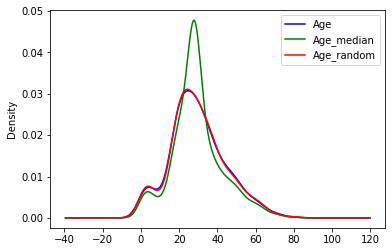

In [11]:
# lets visualize the impact of random sampling on the age column

import matplotlib.pyplot as plt

fig=plt.figure()
axis=fig.add_subplot(111)

dataset['Age'].plot(kind='kde',ax=axis,color='blue')
dataset['Age_median'].plot(kind='kde',ax=axis,color='green')
dataset['Age_random'].plot(kind='kde',ax=axis,color='red')
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')


##### Age and Age_random are overlapping each other

#### Advantage 

1. Easy to implement
2. There is less distortion in the variance

#### Disadvantage

1. Random sampling wont work in every situation


#### Capturing NAN values with new feature

In [12]:
dataset.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [13]:
data=pd.read_csv('Titanic_train.csv',usecols=['Age','Fare','Survived'])

In [14]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
import numpy as np

data['Age_nan']=np.where(data['Age'].isnull(),1,0)

In [17]:
data.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [18]:
median=data['Age'].median()

In [19]:
median

28.0

In [20]:
data['Age'].fillna(median,inplace=True)

In [21]:
data.isnull().mean()

Survived    0.0
Age         0.0
Fare        0.0
Age_nan     0.0
dtype: float64

In [22]:
data.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantage

1. Easy to implement
2. Capturing the importance of missing values

#### Disadvantage

1. Increasing the number of features(curse of dimentionality)

### End of Distribution Imputation

In [23]:
df=pd.read_csv('Titanic_train.csv',usecols=['Age','Fare','Survived'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278F3FB4B88>,
      dtype=object)

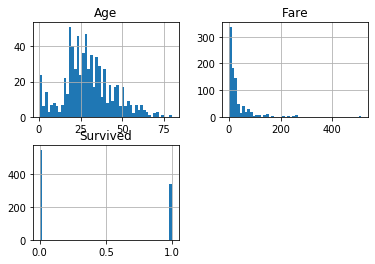

In [24]:
df.hist(bins=50)

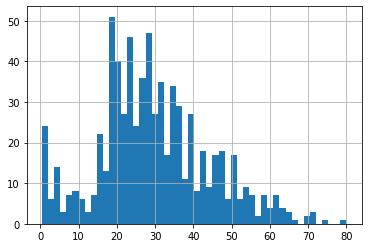

In [25]:
df['Age'].hist(bins=50)

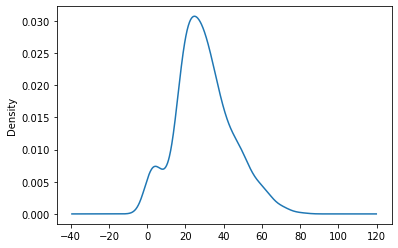

In [26]:
df['Age'].plot(kind='kde')

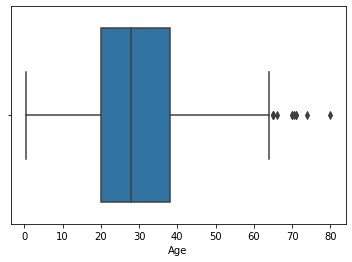

In [27]:
import seaborn as sns
sns.boxplot('Age',data=df)

##### There are some outliers in age data
##### These outliers can be removed with the help of end distribution imputation


In [28]:
# To calculate the extreme values of the age dataset

extreme_values=df['Age'].mean()+3*df['Age'].std()

In [29]:
extreme_values

73.27860964406095

In [30]:
### Now imputing the nan values with this extreme value

def impute_nan_with_extreme(df,feature,median,extreme):
    
    df[feature+'_end_distribution_impute']=df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)

In [31]:
impute_nan_with_extreme(df,'Age',df['Age'].median(),extreme_values)

In [32]:
df.isnull().sum()

Survived                       0
Age                            0
Fare                           0
Age_end_distribution_impute    0
dtype: int64

In [33]:
df.head()

,Survived,Age,Fare,Age_end_distribution_impute
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


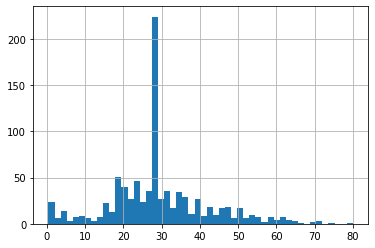

In [34]:
df['Age'].hist(bins=50)

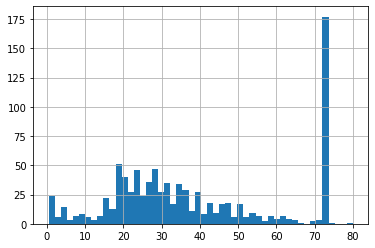

In [35]:
df['Age_end_distribution_impute'].hist(bins=50)

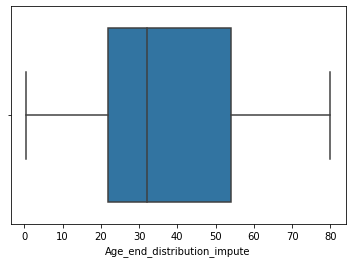

In [36]:
sns.boxplot('Age_end_distribution_impute',data=df)